## Cat-vs-Dog Using CNN MODEL


In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [12]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
import zipfile 
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip", "r")
zip_ref.extractall("/content/catsvsdogs")
zip_ref.close()

In [1]:
import pandas as pd
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [2]:
train_dataset = keras.utils.image_dataset_from_directory(
    directory="/content/catsvsdogs/train",
    # directory="/content/Splited-Dataset/train",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(264, 264)
)

test_dataset = keras.utils.image_dataset_from_directory(
    directory="/content/catsvsdogs/test",
    # directory="/content/Splited-Dataset/test",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(264, 264),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


## MODEL 

In [3]:
#initializing the cnn
model = Sequential()

model.add(Convolution2D(64,3,3,input_shape=(264,264,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 88, 88, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 44, 44, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

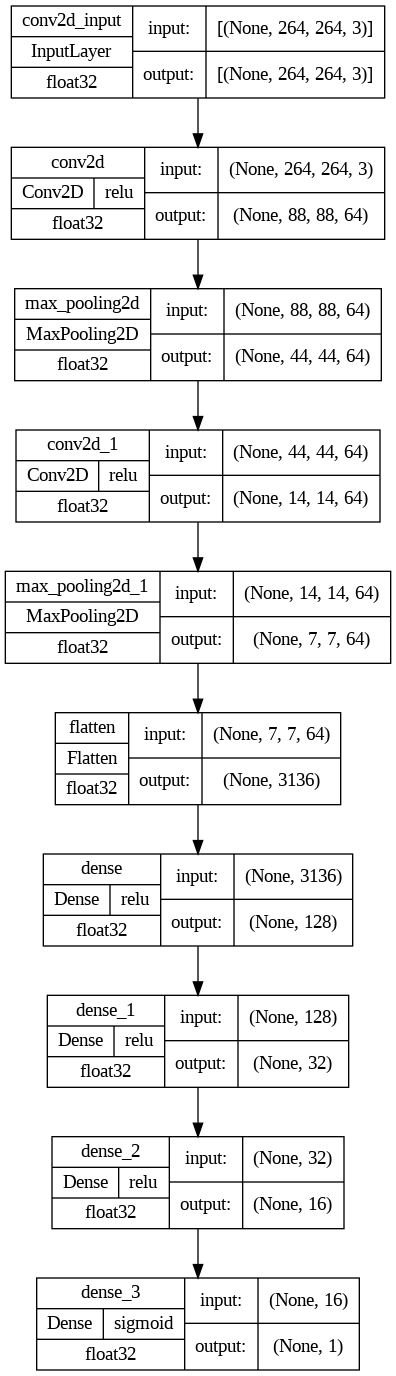

In [4]:
keras.utils.plot_model(
    model, show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [5]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [6]:
history = model.fit(train_dataset,
          epochs=10,
          validation_data=test_dataset)

Epoch 1/10
625/625 [==============================] - 61s 88ms/step - loss: 0.7311 - accuracy: 0.6319 - val_loss: 0.5859 - val_accuracy: 0.6870
Epoch 2/10
625/625 [==============================] - 51s 81ms/step - loss: 0.5700 - accuracy: 0.7038 - val_loss: 0.5263 - val_accuracy: 0.7450
Epoch 3/10
625/625 [==============================] - 45s 71ms/step - loss: 0.5203 - accuracy: 0.7424 - val_loss: 0.4954 - val_accuracy: 0.7600
Epoch 4/10
625/625 [==============================] - 46s 73ms/step - loss: 0.4870 - accuracy: 0.7628 - val_loss: 0.4940 - val_accuracy: 0.7650
Epoch 5/10
625/625 [==============================] - 48s 76ms/step - loss: 0.4467 - accuracy: 0.7890 - val_loss: 0.4917 - val_accuracy: 0.7598
Epoch 6/10
625/625 [==============================] - 45s 72ms/step - loss: 0.4140 - accuracy: 0.8104 - val_loss: 0.5004 - val_accuracy: 0.7778
Epoch 7/10
625/625 [==============================] - 44s 70ms/step - loss: 0.3732 - accuracy: 0.8311 - val_loss: 0.5280 - val_accuracy:

In [7]:
model.save("model.h5")

In [8]:
model = keras.models.load_model('model.h5')

In [9]:
pred = model.predict(test_dataset)

157/157 [==============================] - 8s 48ms/step


In [10]:
pred

array([[3.7344036e-01],
       [7.8567755e-01],
       [9.7834378e-01],
       ...,
       [9.9982053e-01],
       [8.7699769e-03],
       [2.6064939e-05]], dtype=float32)

1/1 [==============================] - 0s 229ms/step
Cat


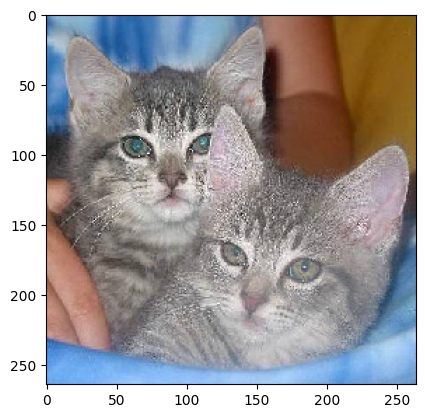

In [11]:
# from keras.preprocessing import image
import keras.utils as image
  
#Input image
test_image = image.load_img('/content/catsvsdogs/test/cats/cat.10021.jpg',
                                      target_size=(264,264))
  
#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
  
# Result array
result = model.predict(test_image)
  
#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")